In [ ]:
import sys

sys.path.append("..")

import yaml
import matplotlib.pyplot as plt

from src.environments import ea
from src.environments.ea_auxiliary import make_eval_env
from src.utils import evaluate_mae

# RL4AA Tutorial -- Part 1

Goal: Solve the ARES Experimental Area tuning problem in a standard setting.

In [3]:
config = yaml.safe_load(open("../config/ea_eval_config.yaml", "r"))
env = make_eval_env(config, ea)

## The EA Tuning Task Setup

Observation:

Actions:


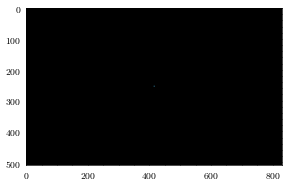

In [4]:
env.reset()
env.unwrapped.get_beam_difference(metric="mae")
plt.imshow(env.unwrapped.render())

## Trying to solve the EA problem

Implement a controller or optimization method, that can bring the observed electron beam $\bm{b}$ to the target beam parameters $\bm{b}'$.

The difference between the beam parameters can be characterized by the mean absolute error (MAE):

$$
d_\text{MAE} (\bm{b}, \bm{b}') = \frac{1}{4} \sum_{i=1}^{4} |\bm{b}_i - \bm{b}'_i|
$$

The algorithm is allowed to interact with the environment for in total $T$ steps. ($T=200$ in this example)

The performance of the method will be evaluated by the following metrics:

- Best MAE achieved by the method $\min d_i, i=1,\dots, T$
- Cumulated MAE differences over the episode $\sum_{i=1}^{T} d_i$

### Baseline Method

To help you get started, below we provide a simple example with the Nelder-Mead optimizer to show how to interact with the env.

In [5]:
# Here we provide the baseline Nelder-Mead simplex Method
from scipy.optimize import minimize


# Wrap the env interaction in an objective function for optimization
def objective(x):
    env.step(x)
    return env.unwrapped.get_beam_difference(metric="mae")


# Reset the Environment
obs, _ = env.reset()

x0 = obs[4:9]

res = minimize(
    objective,
    x0,
    method="nelder-mead",
    options={
        "xatol": 1e-8,
        "disp": True,
        "maxfev": config["env_wrapper"][
            "max_episode_steps"
        ],  # Maximum number of function evaluations
    },
)

C:\Users\hespe\AppData\Local\Temp\ipykernel_15496\3673414813.py:16: RuntimeWarning: Maximum number of function evaluations has been exceeded.
  res = minimize(


## Look into the result

Minimum MAE:                0.466  mm
Sum of MAE over all steps:  223.984 mm


(<Figure size 330x250 with 1 Axes>,
 <Axes: xlabel='Step', ylabel='Mean Absolute Error (mm)'>)

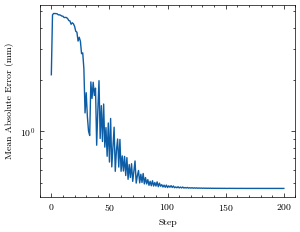

In [6]:
observations = env.get_wrapper_attr("observations")
evaluate_mae(observations)

### Now it is time to develop your own controller!



## Development Ideas:

In the challenge, 

- Have a utility function to prepare the basic env setup (should not be modified) (cheetah backend, magnet range, ...)
  - The users can change the 
  - 
- Create a new env wrapper to log the necessary statistics for the evaluation, e.g.
  - MAEs over steps
  - Wall-time used for each step
- Evaluation Script that runs the control on several tasks and save the results
  - Use argparse to decide which tasks to load, we provide the `train_tasks` in the beginning
  - In the end, we provide the `test_tasks` for the final evaluation
